In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #for mathematical calculations
from matplotlib import pyplot as plt #for plotting graphs
import matplotlib
%matplotlib inline
import warnings #to ignore warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# fill the missing values for numerical terms -mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [9]:
# fill the missing values for categorical terms -mode
df['Gender']=df["Gender"].fillna(df['Gender'].mode()[0])
df['Married']=df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])



In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Explotary analysis

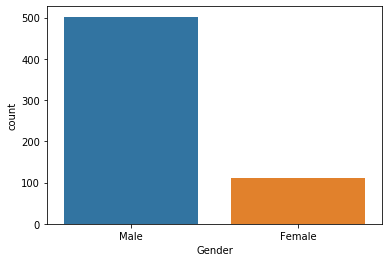

In [11]:
sns.countplot(df['Gender'])

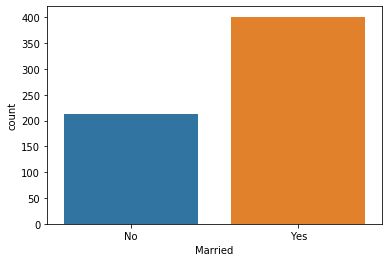

In [12]:
sns.countplot(df['Married'])

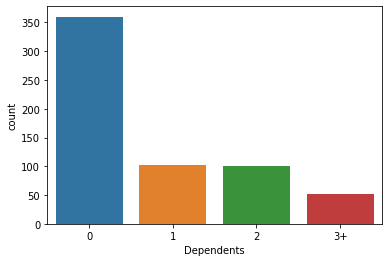

In [13]:
sns.countplot(df['Dependents'])

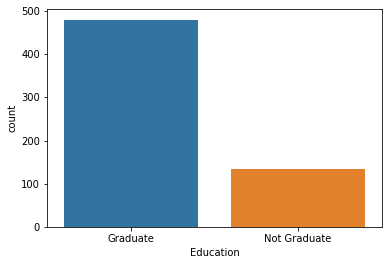

In [14]:
sns.countplot(df['Education'])

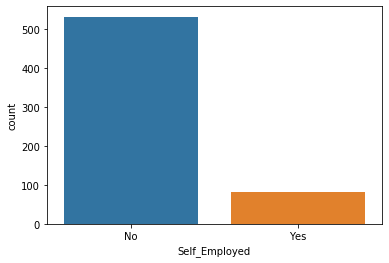

In [15]:
sns.countplot(df['Self_Employed'])

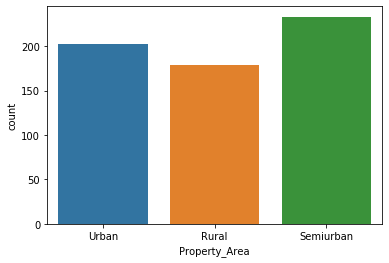

In [16]:
sns.countplot(df['Property_Area'])

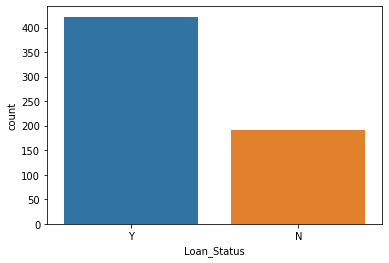

In [17]:
sns.countplot(df['Loan_Status'])

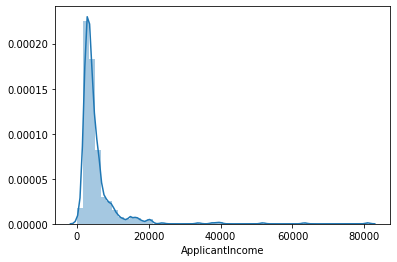

In [18]:
sns.distplot(df['ApplicantIncome'])

In [19]:
# apply the log transformation to the attribute
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

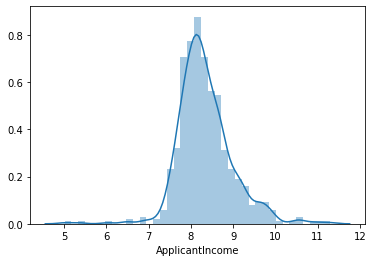

In [20]:
sns.distplot(df['ApplicantIncome'])

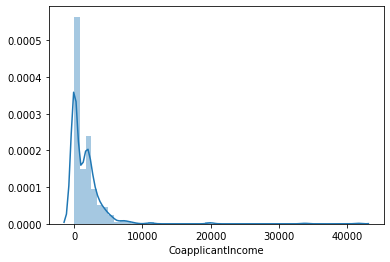

In [21]:
sns.distplot(df['CoapplicantIncome'])

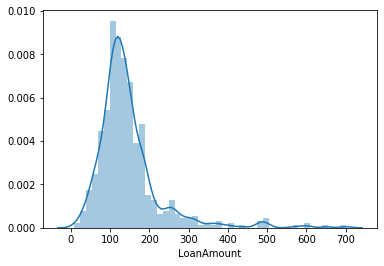

In [22]:
sns.distplot(df["LoanAmount"])


In [23]:
# apply the log transformation to the attribute
df['LoanAmount'] = np.log(df['LoanAmount'])

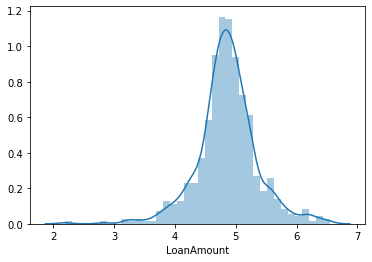

In [24]:
sns.distplot(df["LoanAmount"])

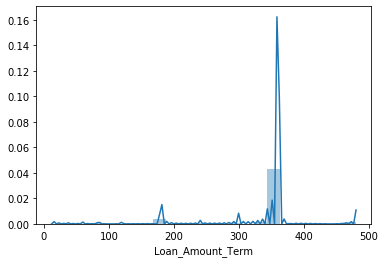

In [25]:
sns.distplot(df["Loan_Amount_Term"])

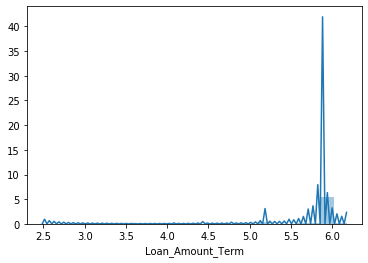

In [26]:
# apply the log transformation to the attribute
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term"])

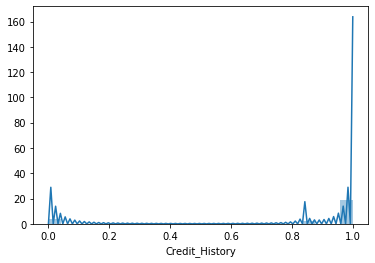

In [27]:
sns.distplot(df["Credit_History"])

# Creation of new attribute

In [28]:
#total income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,1516.430109
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,2365.856707
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515


# log transformation

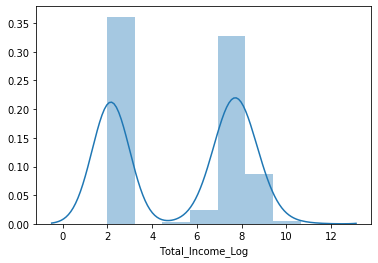

In [29]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

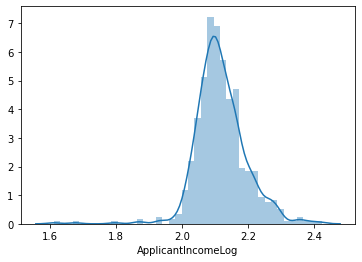

In [30]:
#apply the log transformation to the new attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

ValueError: cannot convert float NaN to integer

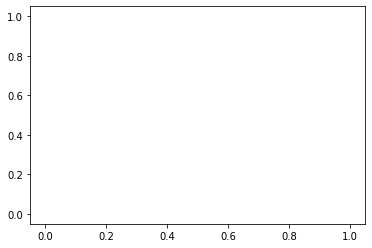

In [31]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["CoapplicantIncomeLog"])

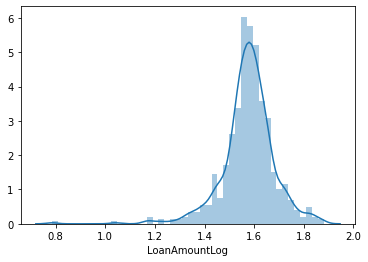

In [32]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

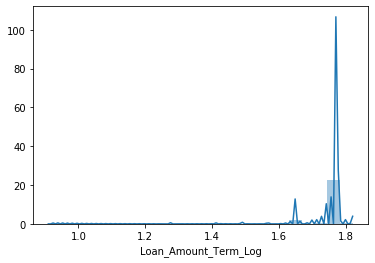

In [33]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

# Coorelation matrix

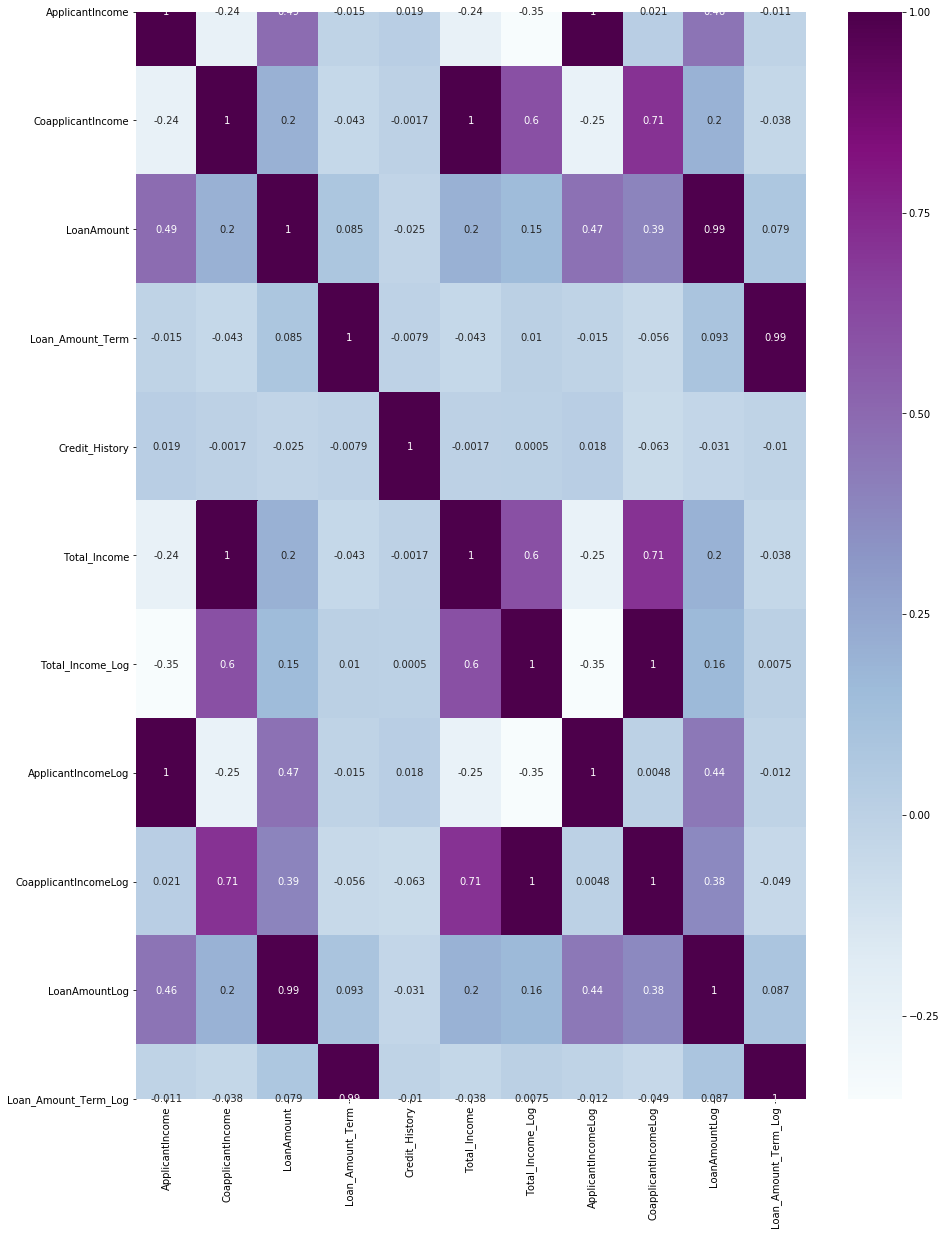

In [34]:
corr = df.corr()
plt.figure(figsize=(15,20))
sns.heatmap(corr, annot = True, cmap ="BuPu")

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026,2.160333,2.160333,-inf,1.606719,1.772594
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,1516.430109,7.324114,2.131810,7.318540,1.579397,1.772594
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368,2.080237,2.080237,-inf,1.432618,1.772594
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,2365.856707,7.768895,2.061368,7.765569,1.566007,1.772594
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515,2.163267,2.163267,-inf,1.599137,1.772594


In [36]:
#drop unecessary columns
cols = ['ApplicantIncome','CoapplicantIncome',"LoanAmount",'Loan_ID','CoapplicantIncomeLog',"Loan_Amount_Term","Total_Income"]
df= df.drop(columns = cols,axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,2.160333,1.606719,1.772594
1,Male,Yes,1,Graduate,No,1.0,Rural,N,7.324114,2.131810,1.579397,1.772594
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,2.080237,1.432618,1.772594
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.768895,2.061368,1.566007,1.772594
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,2.163267,1.599137,1.772594


# Label encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Dependents","Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,2.160333,2.160333,1.606719,1.772594
1,1,1,1,0,0,1.0,0,0,7.324114,2.131810,1.579397,1.772594
2,1,1,0,0,1,1.0,2,1,2.080237,2.080237,1.432618,1.772594
3,1,1,0,1,0,1.0,2,1,7.768895,2.061368,1.566007,1.772594
4,1,0,0,0,0,1.0,2,1,2.163267,2.163267,1.599137,1.772594


# train-test split

In [51]:
#specify input and output attributes
x = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

# Model Training

In [1]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    
    #cross validation- for better validation of a model
    #eg.cv-s, train-4, test-1
    
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation is",np.mean(score)*100)
    

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is 77.27272727272727
Cross Validation is 80.95716552088842


In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)


Accuracy is 71.42857142857143
Cross Validation is 72.818614489688


In [56]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy is 75.32467532467533
Cross Validation is 75.58434690639872


In [58]:
model = ExtraTreesClassifier()
classify(model,x,y)



Accuracy is 70.77922077922078
Cross Validation is 74.2570068746695


# Hyperparameter tuning

In [60]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=25, max_depth=7,max_features=1)
classify(model,x,y)

Accuracy is 72.72727272727273
Cross Validation is 80.3014278159704


# Confusion Matrix

In [62]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[30, 24],
       [13, 87]], dtype=int64)

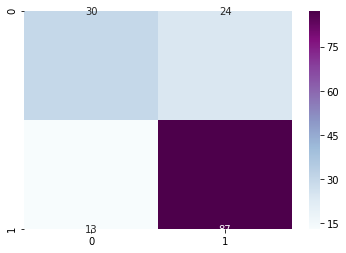

In [67]:
sns.heatmap(cm, annot=True, cmap ="BuPu")